# Predicting Employee Promotion

Promotion or career advancement is a process through which an employee of a company is given a higher share of duties, a higher pay scale, or both. Promotion is not just beneficial for employees but is also highly crucial for the employer or business owners. It boosts the morale of promoted employees, increases their productivity, and hence improves upon the overall profits earned by the organization.

The client is facing a problem in identifying the right people for promotion. The company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

# Data Loading

Our dataset format might be in .csv, excel files, .txt, .json, etc. We can read the dataset with the help of pandas.

In pandas we have a function called read_csv() to read the dataset. As a parameter we have to give the directory of csv file.

In [12]:
import numpy as np
import pandas as pd

In [14]:
data=pd.read_csv('D:\Major project\Dataset\emp_promotion.csv')

In [9]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Data Preprocessing

we need to clean the dataset properly in order to fetch good result,for this we need to follow the below steps.

 1.Removing unnecessary columns.
 
 2.Handling Null values and dealing with wrongly entered data.

For checking the null values, df.isnull() function is used.

In [17]:
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

 we found that education column and previous year rating column has null values.

In [19]:
data.isnull().count()

employee_id             54808
department              54808
region                  54808
education               54808
gender                  54808
recruitment_channel     54808
no_of_trainings         54808
age                     54808
previous_year_rating    54808
length_of_service       54808
KPIs_met >80%           54808
awards_won?             54808
avg_training_score      54808
is_promoted             54808
dtype: int64

In [20]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [21]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [23]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [24]:
data['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [25]:
data['region'].nunique()

34

In [26]:
data['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [31]:
data['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [32]:
data['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

In [33]:
data['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [34]:
data['KPIs_met >80%'].unique()

array([1, 0], dtype=int64)

In [35]:
data['awards_won?'].unique()

array([0, 1], dtype=int64)

In [36]:
data['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [37]:
data['is_promoted'].unique()

array([0, 1], dtype=int64)

In [38]:
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

To sum those null values we use .sum() function to it

In [39]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Let’s handle the null values.

For the education feature and previous year rating feature, null values are replaced with their respective mode[0] values. These two features don’t have continuous values. So, the mode value is replaced. The most frequent repeated value for education column is bachelor’s and for previous year rating is 3.



In [40]:
print(data['education'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [41]:
data.size

767312

In [42]:
data['education']=data['education'].fillna(data['education'].mode()[0])

In [43]:
data.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [44]:
print(data['previous_year_rating'].value_counts())

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [45]:
data['previous_year_rating'].fillna(data['previous_year_rating'].mean())

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [46]:
data.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [47]:
data['previous_year_rating']=data['previous_year_rating'].replace(np.nan,3.329256)

In [48]:
data.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

# Remove Negative Data

Employees with poor performance got promoted. It affects model performance. So, negative value should be removed.

Here list comprehension is used to find the negative data. 

Negative data: Employees with no awards, previous year rating was 1.0, KPIs less than 80% and average training score is less than 60.





In [49]:
negative=data[(data['KPIs_met >80%']==0) & (data['awards_won?']==0) & (data['previous_year_rating']==1.0) & 
         (data['is_promoted']==1) & (data['avg_training_score']<60)]
negative

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,29663,Sales & Marketing,region_22,Bachelor's,m,referred,1,27,1.0,2,0,0,58,1
51374,28327,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,31,1.0,5,0,0,58,1


Now, negative data is removed.

# Drop Unwanted Features

We are building the model to predict the promotion of employees.

No organizations will promote their employees by gender, region, and recruitment channel. So, these features are removed from the dataset

In [50]:
data=data.drop(['gender','region','recruitment_channel'],axis=1)

In [51]:
data

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,65141,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,48945,Technology,Bachelor's,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,1,48,3.0,17,0,0,78,0
54804,74592,Operations,Master's & above,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,Bachelor's,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,Bachelor's,1,29,1.0,2,0,0,45,0


In [52]:
data.drop(index=[31860,51374],inplace=True)

In [53]:
data

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,65141,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,48945,Technology,Bachelor's,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,1,48,3.0,17,0,0,78,0
54804,74592,Operations,Master's & above,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,Bachelor's,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,Bachelor's,1,29,1.0,2,0,0,45,0


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


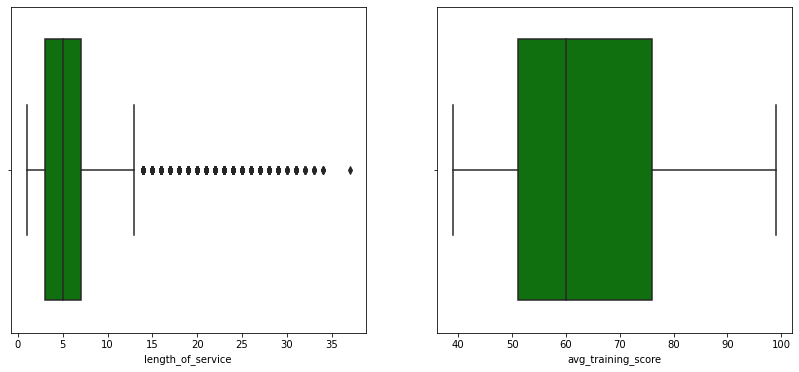

In [56]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(data['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(data['avg_training_score'],color='g')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


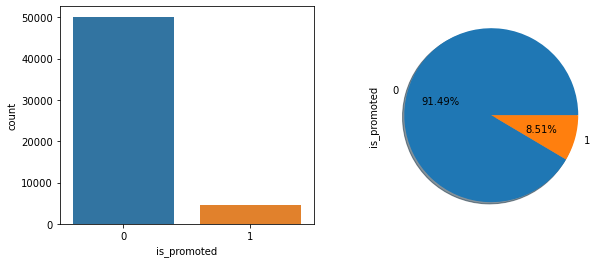

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data['is_promoted'])      
plt.subplot(122)
data['is_promoted'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True)
plt.show()

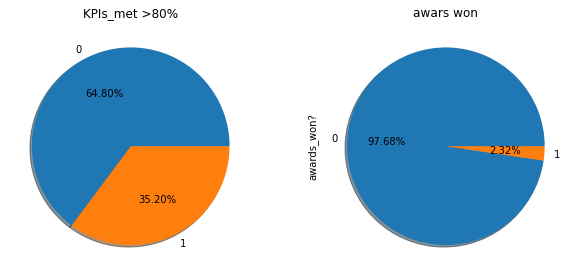

In [60]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
data['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct='%.2f%%')
plt.subplot(232)
plt.title('awars won')
data['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct='%.2f%%')

plt.show()

In [61]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,39196.202879,1.253020,34.804127,3.329341,5.865599,0.351987,0.023173,63.386947,0.085137
std,22586.909147,0.609273,7.660219,1.211601,4.265138,0.477594,0.150453,13.371764,0.279088
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39226.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58731.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Handling Outliers

  With the help of boxplot, outliers are visualized (refer activity 3 univariate analysis). And here we are going to find upper bound and lower bound of Na_to_K feature with some mathematical formula.

 -> To find upper bound we have to multiply IQR (Interquartile range) with 1.5 and add it with 3rd quantile. To find lower bound instead of adding, subtract it with 1st quantile. Take image attached below as your reference.

 ->If outliers are removed, we lose more data. It will impact model performance.

 ->Here removing outliers is impossible. So, the capping technique is used on outliers.

  ->Capping: Replacing the outliers with upper bound values.

In [62]:
q1=np.quantile(data['length_of_service'],0.25)
q3=np.quantile(data['length_of_service'],0.75)
IQR=q3-q1
upperBound=(1.5*IQR)+q3
lowerBound=(1.5*IQR)-q1

In [63]:
print('q1:',q1)
print('q2:',q3)
print('IQR:',IQR)
print('Upperbound:',upperBound)
print('Lowerbound:',lowerBound)
print('skeweddata:',len(data[data['length_of_service']>upperBound]))

q1: 3.0
q2: 7.0
IQR: 4.0
Upperbound: 13.0
Lowerbound: 3.0
skeweddata: 3489


Here outerliers can't be removed.Employee with higher length of service s has higher promotion percentage.
So, capping is done on this feature.

In [64]:
pd.crosstab(data['length_of_service']>upperBound,data['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [65]:
data['length_of_service']=[upperBound if x>upperBound else x for x in data['length_of_service']]

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54806 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54806 non-null  int64  
 1   department            54806 non-null  object 
 2   education             54806 non-null  object 
 3   no_of_trainings       54806 non-null  int64  
 4   age                   54806 non-null  int64  
 5   previous_year_rating  54806 non-null  float64
 6   length_of_service     54806 non-null  float64
 7   KPIs_met >80%         54806 non-null  int64  
 8   awards_won?           54806 non-null  int64  
 9   avg_training_score    54806 non-null  int64  
 10  is_promoted           54806 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 5.0+ MB


In [67]:
data.select_dtypes('object').head(10)

,department,education
0,Sales & Marketing,Master's & above
1,Operations,Bachelor's
2,Sales & Marketing,Bachelor's
3,Sales & Marketing,Bachelor's
4,Technology,Bachelor's
5,Analytics,Bachelor's
6,Operations,Bachelor's
7,Operations,Master's & above
8,Analytics,Bachelor's
9,Sales & Marketing,Master's & above


In [68]:
data['education']=data['education'].replace(('Below secondary',"Bachelor's","Master's & above"),(1,2,3))

In [69]:
data

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,3,1,35,5.0,8.0,1,0,49,0
1,65141,Operations,2,1,30,5.0,4.0,0,0,60,0
2,7513,Sales & Marketing,2,1,34,3.0,7.0,0,0,50,0
3,2542,Sales & Marketing,2,2,39,1.0,10.0,0,0,50,0
4,48945,Technology,2,1,45,3.0,2.0,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,2,1,48,3.0,13.0,0,0,78,0
54804,74592,Operations,3,1,37,2.0,6.0,0,0,56,0
54805,13918,Analytics,2,1,27,5.0,3.0,1,0,79,0
54806,13614,Sales & Marketing,2,1,29,1.0,2.0,0,0,45,0


In [70]:
import warnings 
warnings.filterwarnings('ignore')

lable encoder

In [72]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['department']=lb.fit_transform(data['department'])

In [73]:
data.head()

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,3,1,35,5.0,8.0,1,0,49,0
1,65141,4,2,1,30,5.0,4.0,0,0,60,0
2,7513,7,2,1,34,3.0,7.0,0,0,50,0
3,2542,7,2,2,39,1.0,10.0,0,0,50,0
4,48945,8,2,1,45,3.0,2.0,0,0,73,0


In [74]:
y=data['is_promoted']

In [75]:
x=data.drop('is_promoted',axis=1)

In [76]:
x.shape

(54806, 10)

In [77]:
y.shape

(54806,)

In [78]:
from sklearn.model_selection import train_test_split